#**PRCP- 1001- RiceLeaf disease detection**

**Problem Statement**<br>

Task 1:-Prepare a complete data analysis report on the given data.<br>

Task 2:-Create a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot.<br

Task3:- Analyze various techniques like Data Augmentation, etc and create a report on that.<br>


<h1>Domain Analysis</h1>
This dataset contains 120 jpg images of disease-infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class.
Classes
●	Leaf smut
●	Brown spot
●	Bacterial leaf blight


<h1>Rice Diseases and Their Impact:</h1>
<p>Rice is one of the most important staple crops worldwide, providing sustenance to over half of the world's population. However, rice plants are vulnerable to several diseases that can severely impact the yield and quality of rice production.</p>

<h2>Bacterial Leaf Blight:</h2>
<p>Bacterial leaf blight, caused by the bacterium Xanthomonas oryzae pv. oryzae, is a serious disease that can cause extensive damage to rice plants. The symptoms of bacterial leaf blight include water-soaked lesions on the leaves, which later turn brown and dry up. In severe cases, the disease can cause wilting and death of the plant, leading to a significant reduction in crop yield (1).</p>

<h2>Brown Spot:</h2>
<p>Brown spot, caused by the fungus Cochliobolus miyabeanus, is another major rice disease that can cause significant yield losses. The disease is characterized by small, oval to elliptical spots on the leaves, which turn brown with a yellow halo. In severe cases, the spots can coalesce and cause the leaves to wither and die. Brown spot can also affect the panicles, leading to a reduction in grain quality and yield (2).</p>

<h2>Leaf Smut:</h2>
<p>Leaf smut, caused by the fungus Entyloma oryzae, is a relatively less common rice disease. The symptoms of leaf smut include the formation of small, round, and reddish-brown spots on the leaves. These spots later turn black and produce powdery spores. Although leaf smut does not usually cause significant yield losses, it can affect the quality of rice grains by reducing their weight and size (3).</p>

<h1>Disease Management Strategies:</h1>
<p>Effective disease management strategies are crucial for controlling these diseases and reducing their impact on rice production. Some common methods for disease management include crop rotation, use of resistant cultivars, application of fungicides, and cultural practices such as proper crop spacing and irrigation management (4).</p>

<h1>Machine Learning for Disease Diagnosis:</h1>
<p>In recent years, the use of machine learning algorithms for plant disease diagnosis and classification has gained significant attention. With the availability of large datasets of plant images and advancements in deep learning algorithms, it has become possible to accurately classify plant diseases based on their visual symptoms. This has the potential to improve disease management strategies and reduce the impact of plant diseases on crop production (5).</p>


IMPORTING LIBRARIES

In [ ]:
#basics
import pandas as pd
import numpy as np
import tensorflow as tf
import keras

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#utility & processing
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#cnn architecture
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential

#callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#transfer learning
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet_v2 import ResNet152V2
from keras.applications.xception import Xception

#warnings
# import warnings
# warnings.filterwarnings('ignore')


# print('we are currently using tensorflow version', tf.__version__)




<h3>Collect and Organize the Dataset</h3>

In [ ]:
import os

# Define the path to the "Data" directory
data_dir = './Data/'  # Replace with your "Data" directory path

# Define the new names for the leaf class directories
new_names = ['BacterialLeafBlight', 'BrownSpot', 'LeafSmut']

# Verify that the number of new names matches the number of class directories
if len(new_names) != 3:
    print("Error: You should provide exactly 3 new names for the class directories.")
else:
    # List all subdirectories within the "Data" directory
    class_dirs = sorted([os.path.join(data_dir, class_name) for class_name in os.listdir(data_dir) if not class_name.startswith('.')])

    # Verify that there are exactly 3 subdirectories to rename
    if len(class_dirs) != 3:
        print("Error: There should be exactly 3 class directories to rename.")
    else:

        #Rename the class directories
        for i, class_dir in enumerate(class_dirs):
            new_dir_name = os.path.join(data_dir, new_names[i])
            os.rename(class_dir, new_dir_name)
            print(f"Renamed '{os.path.basename(class_dir)}' to '{new_names[i]}'.")

print("Directory renaming completed.")


Renamed 'BacterialLeafBlight' to 'BacterialLeafBlight'.
Renamed 'BrownSpot' to 'BrownSpot'.
Renamed 'LeafSmut' to 'LeafSmut'.
Directory renaming completed.


In [ ]:
BacterialLeafBlight = os.listdir("./Data/BacterialLeafBlight/")
BrownSpot = os.listdir("./Data/BrownSpot/")
LeafSmut = os.listdir("./Data/LeafSmut/")

print("Number of Leaf Blight Data : {}".format(len(BacterialLeafBlight)))
print("Number of Brown Spot Data : {}".format(len(BrownSpot)))
print("Number of Leaf Smut Data : {}".format(len(LeafSmut)))


Number of Leaf Blight Data : 40
Number of Brown Spot Data : 39
Number of Leaf Smut Data : 40


##Setting up an environment

In [ ]:

input_shape_2D=(224,224)
input_shape_3D= (224,224,3)
seed=1
batch_size=32
epochs=50
stopper=EarlyStopping(patience=5)
dataset_dir='./Data/'
num_classes=3

## Data Processing

In [ ]:
import os
import cv2

# Define the directory containing your images and subdirectories
root_directory = './Data/'  # Replace with your dataset path

# Define the target size (e.g., 224x224 pixels)
target_size = (224, 224)

# Define a function to resize images in a directory and its subdirectories
def resize_images_in_directory(directory_path):
    for subdirectory in os.listdir(directory_path):
        subdirectory_path = os.path.join(directory_path, subdirectory)
        if os.path.isdir(subdirectory_path):
            for file in os.listdir(subdirectory_path):

                image_path = os.path.join(subdirectory_path, file)

                if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif','.JPG')):
                    image = cv2.imread(image_path)

                    if image is not None:
                        resized_image = cv2.resize(image, target_size)
                        cv2.imwrite(image_path, resized_image)
                    else:
                        print(f"Failed to read image: {image_path}")

# Resize images in the "Data" directory and its subdirectories
resize_images_in_directory(root_directory)

print("Image resizing completed.")

Image resizing completed.


In [ ]:
# Define a function to load and preprocess images in a directory and its subdirectories
def load_and_preprocess_images(directory_path):
    images = []
    labels = []

    for subdirectory in os.listdir(directory_path):
        subdirectory_path = os.path.join(directory_path, subdirectory)
        if os.path.isdir(subdirectory_path):
            class_label = subdirectory  # Use the subdirectory name as the class label
            for file in os.listdir(subdirectory_path):
                image_path = os.path.join(subdirectory_path, file)
                if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif','.JPG')):
                    image = cv2.imread(image_path)
                    if image is not None:
                        # Resize the image to the target size
                        resized_image = cv2.resize(image, target_size)

                        # Normalize pixel values to the [0, 1] range
                        normalized_image = resized_image / 255.0

                        images.append(normalized_image)
                        labels.append(class_label)
                    else:
                        print(f"Failed to read image: {image_path}")

    return np.array(images), np.array(labels)

# Load and preprocess images in the "Data" directory and its subdirectories
X, y = load_and_preprocess_images(root_directory)

print("Image loading and preprocessing completed.")

Image loading and preprocessing completed.


In [ ]:
# Split your data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the shapes of the resulting sets
print(f"Training set: X_train shape = {X_train.shape}, y_train shape = {y_train.shape}")
print(f"Validation set: X_validation shape = {X_validation.shape}, y_validation shape = {y_validation.shape}")
print(f"Test set: X_test shape = {X_test.shape}, y_test shape = {y_test.shape}")


Training set: X_train shape = (71, 224, 224, 3), y_train shape = (71,)
Validation set: X_validation shape = (24, 224, 224, 3), y_validation shape = (24,)
Test set: X_test shape = (24, 224, 224, 3), y_test shape = (24,)


## Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Create a LabelEncoder
label_encoder = LabelEncoder()

# Convert class labels (strings) to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


from tensorflow.keras.utils import to_categorical

num_classes = 3  # Assuming you have 3 classes

# Convert to one-hot encoded format
y_train = to_categorical(y_train_encoded, num_classes=num_classes)
y_test = to_categorical(y_test_encoded, num_classes=num_classes)


## Build a Convolutional Neural Network (CNN):

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam,legacy
from tensorflow.keras.losses import categorical_crossentropy



# Create a Sequential model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Fully connected layers
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer for regularization

model.add(Dense(num_classes, activation='softmax'))  # Adjust num_classes based on your dataset


# Choose an optimizer and its associated learning rate
# Define hyperparameters
learning_rate = 0.001  # Adjust the learning rate

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer,  # Adjust learning rate as needed
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)     

## Data Augmentation<br>

Data augmentation is a technique used to increase the size and diversity of a dataset by applying various transformations to the existing data. This technique has become an essential tool in computer vision and image processing tasks, such as object recognition and classification, due to its ability to enhance the generalization ability of machine learning models and prevent overfitting.

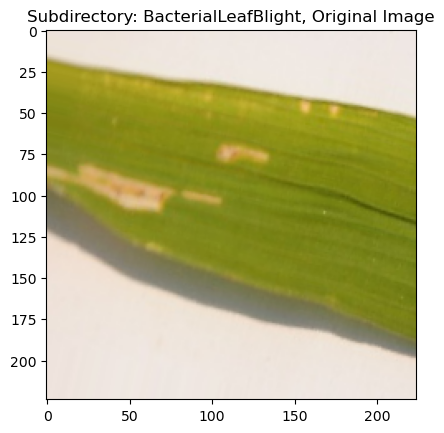

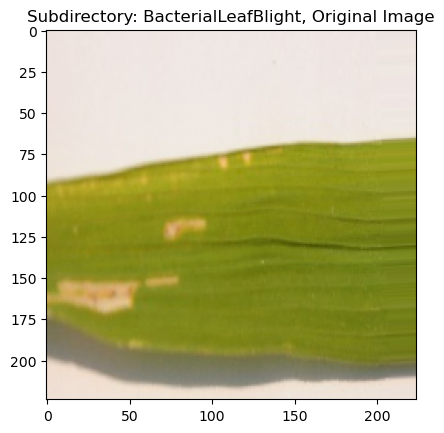

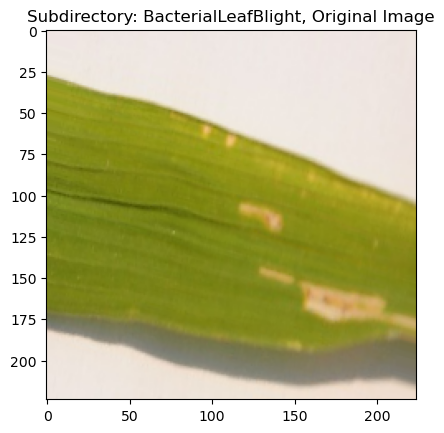

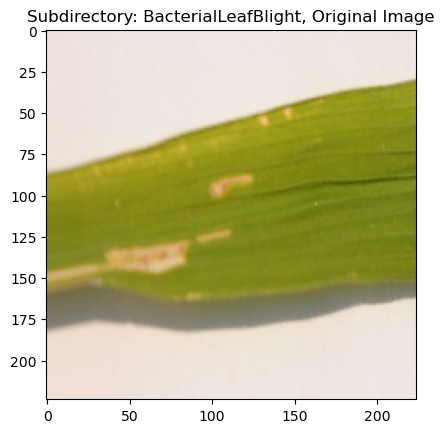

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img


# Define the root directory containing the subdirectories
root_directory = dataset_dir  # Replace with your "Data" directory path
target_size = (224, 224)

# Create an instance of the ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

# Function to load and apply data augmentation to images in subdirectories
def apply_data_augmentation(directory, num_images=4):
    subdirectories = [subdir for subdir in os.listdir(directory) if os.path.isdir(os.path.join(directory, subdir))]

    for subdir in subdirectories:
        subdir_path = os.path.join(directory, subdir)
        for i, filename in enumerate(os.listdir(subdir_path)):
            if i >= num_images:
                break
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif','.JPG')):
                img_path = os.path.join(subdir_path, filename)
                img = load_img(img_path, target_size=target_size)
                x = img_to_array(img)
                x = x.reshape((1,) + x.shape)

                # Generate augmented images
                i_augmented = 0
                for batch in datagen.flow(x, batch_size=1):
                    plt.figure(i_augmented)
                    imgplot = plt.imshow(np.uint8(batch[0]))
                    plt.title(f"Subdirectory: {subdir}, Original Image")
                    i_augmented += 1
                    if i_augmented % 4 == 0:  # Generate and display 4 augmented images
                        break

# Apply data augmentation to images in subdirectories
apply_data_augmentation(data_dir, num_images=4)

# Show the augmented images
plt.show()



##  Evaluation

In [ ]:
def plot_performance(model_name, acc, val_acc, loss, val_loss):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('{} : Loss'.format(model_name), fontsize=12, fontweight='bold')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper right')

    plt.subplot(1,2,2)
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('{} : Accuracy'.format(model_name), fontsize=12, fontweight='bold')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper right')

    plt.tight_layout()

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

<h3><u>Without Argumentation</u></h3>

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# # Define callback functions for model checkpointing and early stopping
checkpointer_own = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# # Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_split=0.2, callbacks=[checkpointer_own, early_stopping])

# # Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50
2/2 [==============================] - ETA: 0s - loss: 0.1004 - accuracy: 0.9821
Epoch 1: val_loss improved from inf to 0.42895, saving model to model.weights.best.hdf5
2/2 [==============================] - 2s 1s/step - loss: 0.1004 - accuracy: 0.9821 - val_loss: 0.4290 - val_accuracy: 0.8667
Epoch 2/50
2/2 [==============================] - ETA: 0s - loss: 0.0780 - accuracy: 0.9821
Epoch 2: val_loss did not improve from 0.42895
2/2 [==============================] - 1s 596ms/step - loss: 0.0780 - accuracy: 0.9821 - val_loss: 0.5717 - val_accuracy: 0.7333
Epoch 3/50
2/2 [==============================] - ETA: 0s - loss: 0.0542 - accuracy: 1.0000
Epoch 3: val_loss did not improve from 0.42895
2/2 [==============================] - 1s 528ms/step - loss: 0.0542 - accuracy: 1.0000 - val_loss: 0.5152 - val_accuracy: 0.8000
Epoch 4/50
2/2 [==============================] - ETA: 0s - loss: 0.0610 - accuracy: 0.9821
Epoch 4: val_loss did not improve from 0.42895
2/2 [==============

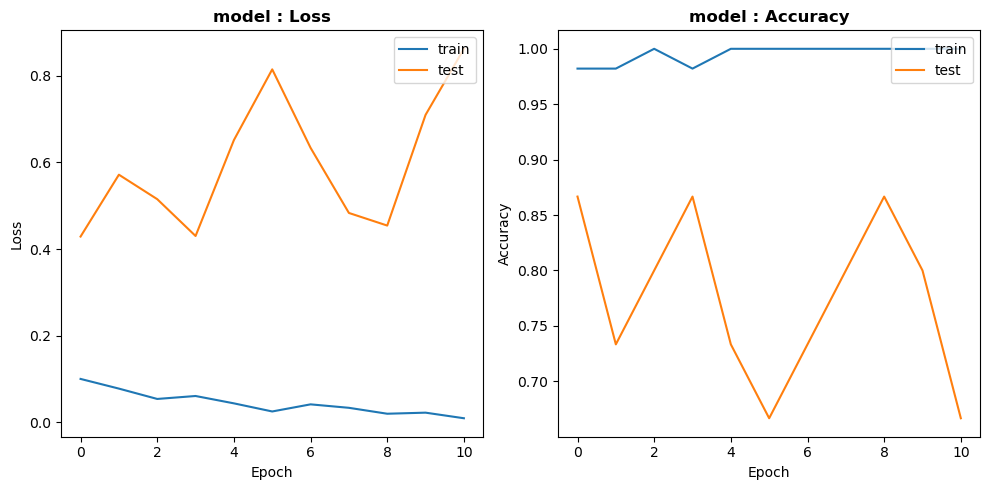

In [ ]:
plot_performance(model_name= 'model',
                 acc=history.history['accuracy'],
                 val_acc=history.history['val_accuracy'],
                 loss=history.history['loss'],
                 val_loss=history.history['val_loss'])

<h3><u>With Argumentation</u></h3>

In [ ]:
checkpointer_own_aug = ModelCheckpoint(filepath='own_model_aug.weights.best.hdf5', verbose=3, save_best_only=True)

aug_history= model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train)//batch_size,
    epochs=epochs,
    callbacks=[stopper, checkpointer_own_aug]
)

# # Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/50


2023-10-13 16:32:13.954322: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - ETA: 0s - loss: 0.9464 - accuracy: 0.5641
Epoch 1: val_loss improved from inf to 0.89587, saving model to own_model_aug.weights.best.hdf5
2/2 [==============================] - 2s 1s/step - loss: 0.9464 - accuracy: 0.5641 - val_loss: 0.8959 - val_accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - ETA: 0s - loss: 0.9713 - accuracy: 0.4103
Epoch 2: val_loss did not improve from 0.89587
2/2 [==============================] - 1s 334ms/step - loss: 0.9713 - accuracy: 0.4103 - val_loss: 1.0494 - val_accuracy: 0.4167
Epoch 3/50
2/2 [==============================] - ETA: 0s - loss: 0.8388 - accuracy: 0.6410
Epoch 3: val_loss did not improve from 0.89587
2/2 [==============================] - 1s 316ms/step - loss: 0.8388 - accuracy: 0.6410 - val_loss: 0.9595 - val_accuracy: 0.4583
Epoch 4/50
2/2 [==============================] - ETA: 0s - loss: 0.9077 - accuracy: 0.6410
Epoch 4: val_loss did not improve from 0.89587
2/2 [=================

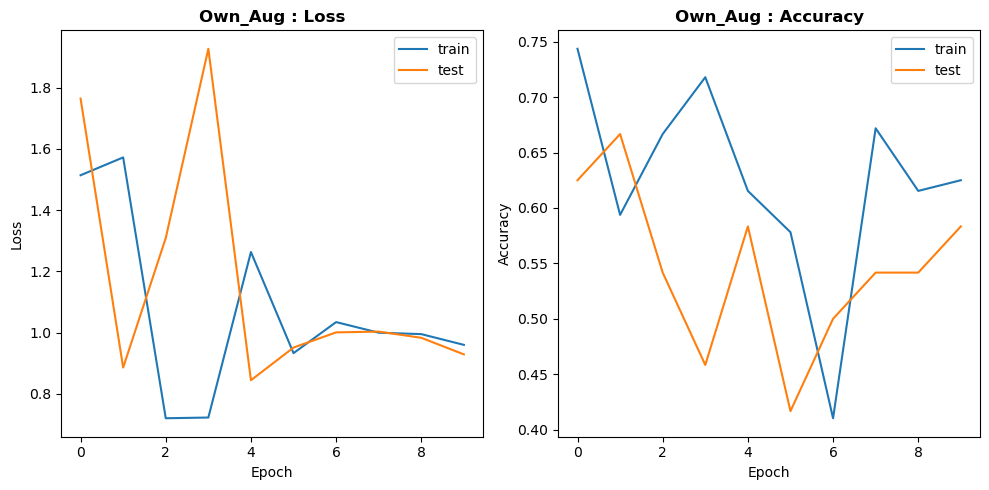

In [ ]:
#visualising model performance
plot_performance(model_name='Own_Aug',
                  acc=aug_history.history['accuracy'],
                 val_acc=aug_history.history['val_accuracy'],
                 loss=aug_history.history['loss'],
                 val_loss=aug_history.history['val_loss'])

## Transfer Learning

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model




In [ ]:

# Load the pre-trained model without the top (classification) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer with your desired number of units (neurons)
x = Dense(256, activation='relu')(x)

# Add the output layer with the number of classes in your task
predictions = Dense(num_classes, activation='softmax')(x)

# Create a new model by combining the base model and your classification layers
model_vgg = Model(inputs=base_model.input, outputs=predictions)


<h6><u>Without Augmentation</u></h6>

In [ ]:
# Freeze the layers in the pre-trained model
for layer in base_model.layers:
    layer.trainable = False



# Compile the model
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the top layers
model_vgg.fit(X_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2, callbacks=[checkpointer_own, early_stopping])

# Unfreeze some layers for further fine-tuning (optional)
for layer in base_model.layers[:100]:  # Example: Unfreeze the first 100 layers
    layer.trainable = True

# Compile the model again and fine-tune the entire model
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_vgg=model_vgg.fit(X_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2, callbacks=[checkpointer_own, early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model_vgg.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50
2/2 [==============================] - ETA: 0s - loss: 1.2647 - accuracy: 0.3393
Epoch 1: val_loss did not improve from 0.42895
2/2 [==============================] - 8s 5s/step - loss: 1.2647 - accuracy: 0.3393 - val_loss: 1.1312 - val_accuracy: 0.1333
Epoch 2/50
2/2 [==============================] - ETA: 0s - loss: 1.0775 - accuracy: 0.3750
Epoch 2: val_loss did not improve from 0.42895
2/2 [==============================] - 7s 4s/step - loss: 1.0775 - accuracy: 0.3750 - val_loss: 1.2678 - val_accuracy: 0.1333
Epoch 3/50
2/2 [==============================] - ETA: 0s - loss: 1.0532 - accuracy: 0.3750
Epoch 3: val_loss did not improve from 0.42895
2/2 [==============================] - 8s 4s/step - loss: 1.0532 - accuracy: 0.3750 - val_loss: 1.1100 - val_accuracy: 0.1333
Epoch 4/50
2/2 [==============================] - ETA: 0s - loss: 0.9828 - accuracy: 0.4107
Epoch 4: val_loss did not improve from 0.42895
2/2 [==============================] - 8s 4s/step - loss: 0.9828 -

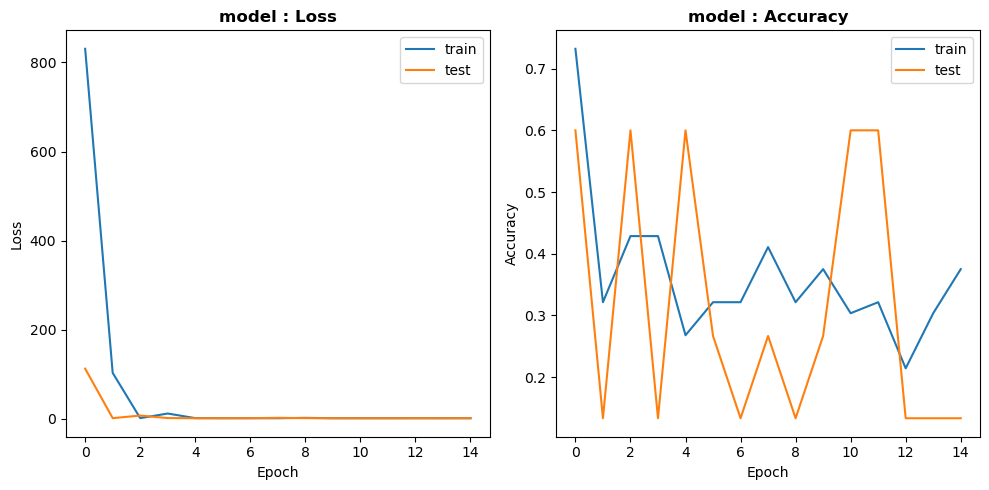

In [ ]:
plot_performance(model_name= 'model',
                 acc=history_vgg.history['accuracy'],
                 val_acc=history_vgg.history['val_accuracy'],
                 loss=history_vgg.history['loss'],
                 val_loss=history_vgg.history['val_loss'])

<h6><u>With Augmentation</u></h6>

In [ ]:


# Load the pre-trained VGG16 model without the top (classification) layers
base_model_with_aug = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own classification layers on top of the pre-trained model
x = base_model_with_aug.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling Layer
x = Dense(256, activation='relu')(x)  # Fully Connected Layer with ReLU activation
predictions = Dense(num_classes, activation='softmax')(x)  # Output layer with softmax activation

# Create a new model by combining the base model and your classification layers
model_with_aug = Model(inputs=base_model_with_aug.input, outputs=predictions)

# Optionally, you can choose to freeze some layers in the base model
for layer in base_model_with_aug.layers:
    layer.trainable = False

# Compile the model
model_with_aug.compile(optimizer=legacy.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Set up data augmentation using ImageDataGenerator
datagen_with_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess your data (replace with your data loading code)

# Train the model with data augmentation
history_with_vgg=model_with_aug.fit(datagen_with_aug.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model_with_aug.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/10


2023-10-13 17:03:56.375308: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3/3 [==============================] - 11s 3s/step - loss: 1.3233 - accuracy: 0.2958 - val_loss: 1.1107 - val_accuracy: 0.4583
Epoch 2/10
3/3 [==============================] - 10s 5s/step - loss: 1.0656 - accuracy: 0.3803 - val_loss: 1.0489 - val_accuracy: 0.4167
Epoch 3/10
3/3 [==============================] - 10s 5s/step - loss: 0.9790 - accuracy: 0.5915 - val_loss: 1.0128 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 10s 5s/step - loss: 0.8964 - accuracy: 0.6479 - val_loss: 0.9810 - val_accuracy: 0.6250
Epoch 5/10
3/3 [==============================] - 10s 3s/step - loss: 0.8703 - accuracy: 0.7183 - val_loss: 0.9267 - val_accuracy: 0.6667
Epoch 6/10
3/3 [==============================] - 10s 3s/step - loss: 0.8365 - accuracy: 0.7042 - val_loss: 0.8941 - val_accuracy: 0.6667
Epoch 7/10
3/3 [==============================] - 10s 5s/step - loss: 0.7639 - accuracy: 0.7324 - val_loss: 0.8885 - val_accuracy: 0.6667
Epoch 8/10
3/3 [=============================

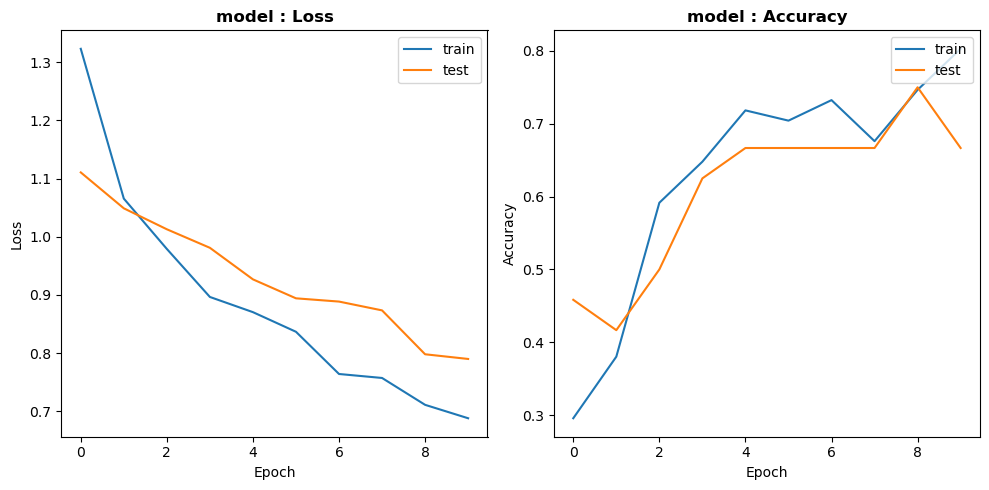

In [ ]:
plot_performance(model_name= 'model',
                 acc=history_with_vgg.history['accuracy'],
                 val_acc=history_with_vgg.history['val_accuracy'],
                 loss=history_with_vgg.history['loss'],
                 val_loss=history_with_vgg.history['val_loss'])

## InceptionV3

In [ ]:
inception_base=tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=input_shape_3D,
)

#unfreezing the convloution layers
inception_base.trainable=True
set_trainable=False

for layer in inception_base.layers:
  if layer.name=='mixed9_0':
    set_trainable=True

  if set_trainable==True:
    layer.trainable=True

  else:
    layer.trainable=False


# building fully connected layers
inception_model= Sequential()

inception_model.add(inception_base)
inception_model.add(Flatten())

inception_model.add(Dense(128, activation='relu'))
inception_model.add(Dense(3, activation='softmax'))


#compiling
inception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

<h3><u>Without Augmentation</u></h3>

In [ ]:
#training model
checkpointer_inception = ModelCheckpoint(filepath='inception.weights.best.hdf5', verbose=3, save_best_only=True)

inception_history= inception_model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    callbacks=[checkpointer_inception,early_stopping]
)

# Evaluate the model on the test set
test_loss, test_accuracy = inception_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/50
3/3 [==============================] - ETA: 0s - loss: 7.0516e-07 - accuracy: 1.0000
Epoch 1: val_loss improved from inf to 18.72208, saving model to inception.weights.best.hdf5
3/3 [==============================] - 3s 920ms/step - loss: 7.0516e-07 - accuracy: 1.0000 - val_loss: 18.7221 - val_accuracy: 0.8333
Epoch 2/50
3/3 [==============================] - ETA: 0s - loss: 0.0267 - accuracy: 0.9859    
Epoch 2: val_loss improved from 18.72208 to 18.05675, saving model to inception.weights.best.hdf5
3/3 [==============================] - 3s 920ms/step - loss: 0.0267 - accuracy: 0.9859 - val_loss: 18.0567 - val_accuracy: 0.8333
Epoch 3/50
3/3 [==============================] - ETA: 0s - loss: 0.3974 - accuracy: 0.9859
Epoch 3: val_loss did not improve from 18.05675
3/3 [==============================] - 3s 854ms/step - loss: 0.3974 - accuracy: 0.9859 - val_loss: 19.2587 - val_accuracy: 0.7917
Epoch 4/50
3/3 [==============================] - ETA: 0s - loss: 1.6790e-09 - accu

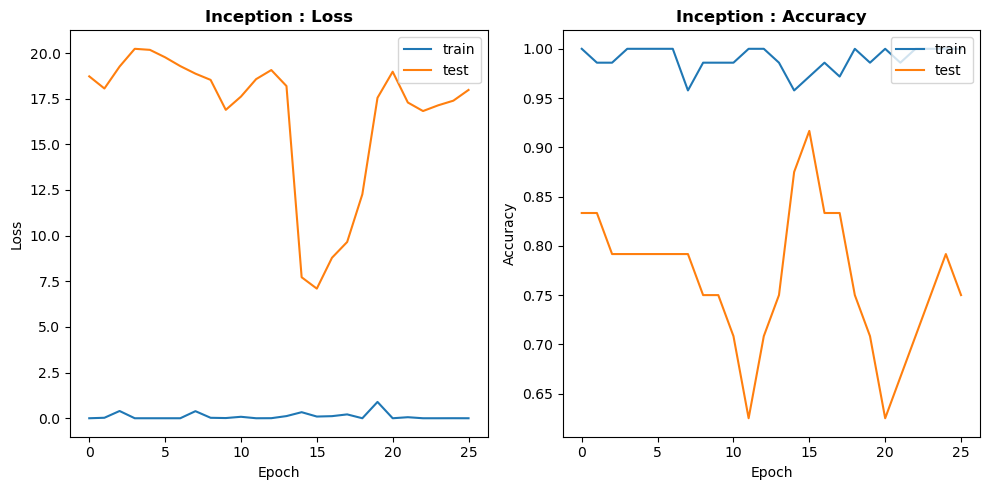

In [ ]:
plot_performance(model_name='Inception',
                acc=inception_history.history['accuracy'],
                 val_acc=inception_history.history['val_accuracy'],
                 loss=inception_history.history['loss'],
                 val_loss=inception_history.history['val_loss'])


<h3><u>With Augmentation</u></h3>

In [ ]:
#training model
checkpointer_inception_aug = ModelCheckpoint(filepath='inception_aug.weights.best.hdf5', verbose=3, save_best_only=True)

inception_history_aug= inception_model.fit(
    datagen.flow(X_train,y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train)//batch_size,
    epochs=epochs,
    callbacks=[checkpointer_inception_aug,early_stopping]
)

# Evaluate the model on the test set
test_loss, test_accuracy = inception_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/50


2023-10-13 17:11:57.565474: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - ETA: 0s - loss: 0.0104 - accuracy: 1.0000
Epoch 1: val_loss improved from inf to 13.36115, saving model to inception_aug.weights.best.hdf5
2/2 [==============================] - 3s 2s/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 13.3612 - val_accuracy: 0.8750
Epoch 2/50
2/2 [==============================] - ETA: 0s - loss: 0.2539 - accuracy: 0.9531    
Epoch 2: val_loss did not improve from 13.36115
2/2 [==============================] - 2s 1s/step - loss: 0.2539 - accuracy: 0.9531 - val_loss: 15.5297 - val_accuracy: 0.8750
Epoch 3/50
2/2 [==============================] - ETA: 0s - loss: 0.0959 - accuracy: 0.9744
Epoch 3: val_loss did not improve from 13.36115
2/2 [==============================] - 2s 775ms/step - loss: 0.0959 - accuracy: 0.9744 - val_loss: 19.1316 - val_accuracy: 0.8333
Epoch 4/50
2/2 [==============================] - ETA: 0s - loss: 0.5073 - accuracy: 0.9744    
Epoch 4: val_loss did not improve from 13.36115
2/2 [=====

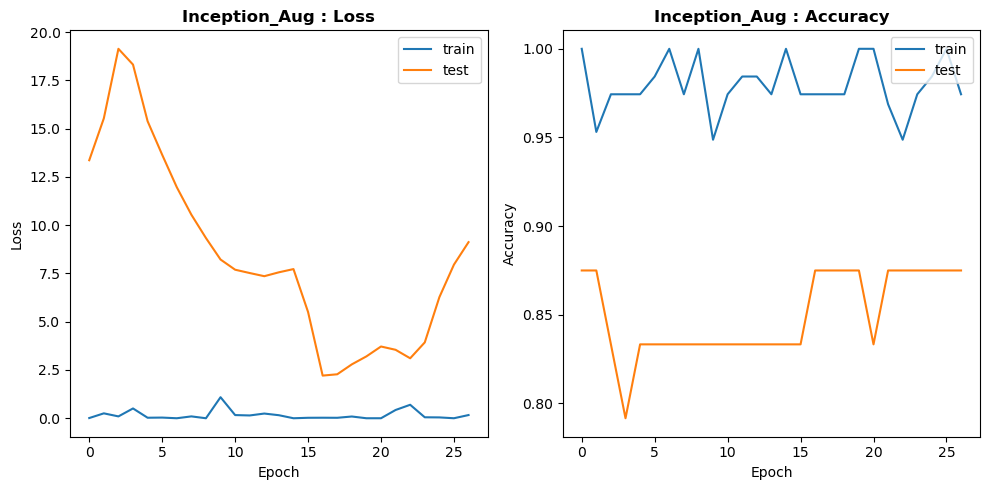

In [ ]:
plot_performance(model_name='Inception_Aug',
                acc=inception_history_aug.history['accuracy'],
                 val_acc=inception_history_aug.history['val_accuracy'],
                 loss=inception_history_aug.history['loss'],
                 val_loss=inception_history_aug.history['val_loss'])


## ResNET

In [ ]:
resnet_base=ResNet152V2(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape_3D
)

resnet_base.trainable=True
set_trainable=False

for layer in resnet_base.layers:
  if layer.name=='conv5_block1_preact_bn':
    set_trainable=True

  if set_trainable==True:
    layer.trainable=True
  else:
    layer.trainable=False

#builing fully connected layers
resnet_model=Sequential()

resnet_model.add(resnet_base)
resnet_model.add(Flatten())

resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dense(3, activation='softmax'))

resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


<h3><u>Without Augmentation</u></h3>

In [ ]:
#training model
checkpointer_resnet= ModelCheckpoint(filepath='resnet.weights.best.hdf5', verbose=3, save_best_only=True)


resnet_history=resnet_model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
     callbacks=[checkpointer_resnet,early_stopping]
)

# Evaluate the model on the test set
test_loss, test_accuracy = resnet_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/50
3/3 [==============================] - ETA: 0s - loss: 3.3996 - accuracy: 0.5070
Epoch 1: val_loss improved from inf to 34.90746, saving model to resnet.weights.best.hdf5
3/3 [==============================] - 15s 4s/step - loss: 3.3996 - accuracy: 0.5070 - val_loss: 34.9075 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - ETA: 0s - loss: 1.7588 - accuracy: 0.6901
Epoch 2: val_loss improved from 34.90746 to 12.30085, saving model to resnet.weights.best.hdf5
3/3 [==============================] - 10s 3s/step - loss: 1.7588 - accuracy: 0.6901 - val_loss: 12.3009 - val_accuracy: 0.5833
Epoch 3/50
3/3 [==============================] - ETA: 0s - loss: 0.4567 - accuracy: 0.8028
Epoch 3: val_loss did not improve from 12.30085
3/3 [==============================] - 9s 3s/step - loss: 0.4567 - accuracy: 0.8028 - val_loss: 27.4159 - val_accuracy: 0.4583
Epoch 4/50
3/3 [==============================] - ETA: 0s - loss: 0.1960 - accuracy: 0.9437
Epoch 4: val_los

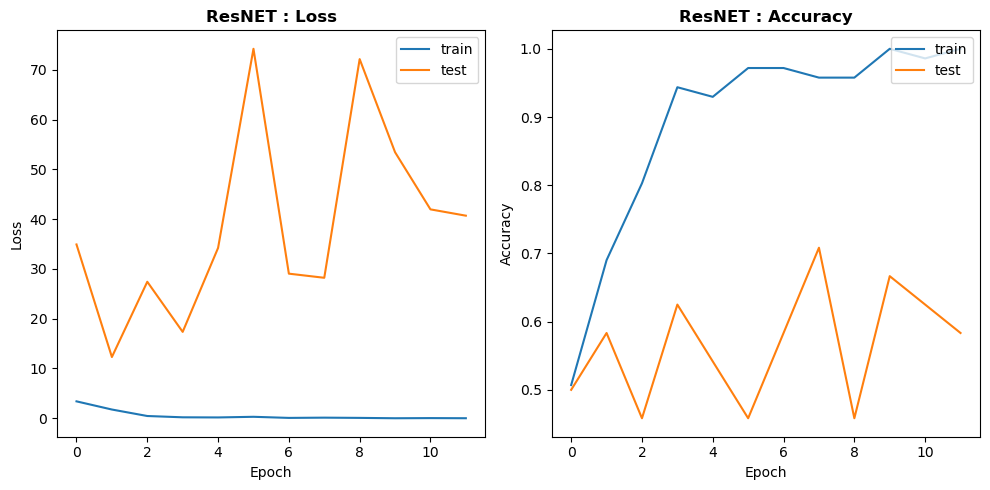

In [ ]:
plot_performance(model_name='ResNET',
                acc=resnet_history.history['accuracy'],
                 val_acc=resnet_history.history['val_accuracy'],
                 loss=resnet_history.history['loss'],
                 val_loss=resnet_history.history['val_loss'])

<h3><u>With Augmentation</u></h3>

In [ ]:
checkpointer_resnet= ModelCheckpoint(filepath='resnet_aug.weights.best.hdf5', verbose=3, save_best_only=True)

resnet_history_aug=resnet_model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train)//batch_size,
    epochs=epochs,
    callbacks=[checkpointer_resnet,early_stopping]
)

# Evaluate the model on the test set
test_loss, test_accuracy = resnet_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/50


2023-10-13 17:16:58.128704: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - ETA: 0s - loss: 2.2122 - accuracy: 0.8205
Epoch 1: val_loss improved from inf to 69.51923, saving model to resnet_aug.weights.best.hdf5
2/2 [==============================] - 9s 7s/step - loss: 2.2122 - accuracy: 0.8205 - val_loss: 69.5192 - val_accuracy: 0.7083
Epoch 2/50
2/2 [==============================] - ETA: 0s - loss: 0.0707 - accuracy: 0.9744
Epoch 2: val_loss did not improve from 69.51923
2/2 [==============================] - 6s 3s/step - loss: 0.0707 - accuracy: 0.9744 - val_loss: 398.2830 - val_accuracy: 0.5000
Epoch 3/50
2/2 [==============================] - ETA: 0s - loss: 0.8162 - accuracy: 0.9062
Epoch 3: val_loss did not improve from 69.51923
2/2 [==============================] - 8s 5s/step - loss: 0.8162 - accuracy: 0.9062 - val_loss: 131.5109 - val_accuracy: 0.5000
Epoch 4/50
2/2 [==============================] - ETA: 0s - loss: 0.0959 - accuracy: 0.9844
Epoch 4: val_loss did not improve from 69.51923
2/2 [=================

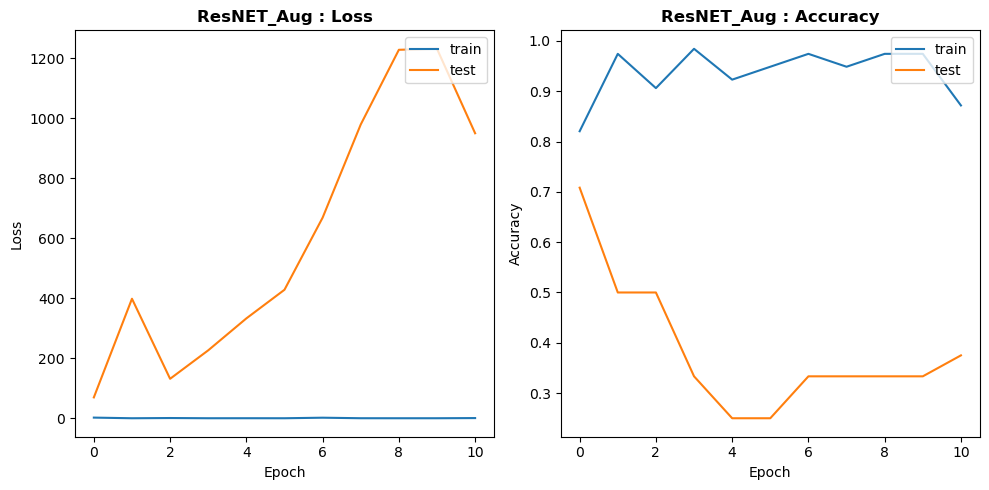

In [ ]:
plot_performance(model_name='ResNET_Aug',
                acc=resnet_history_aug.history['accuracy'],
                 val_acc=resnet_history_aug.history['val_accuracy'],
                 loss=resnet_history_aug.history['loss'],
                 val_loss=resnet_history_aug.history['val_loss'])



## Xception

Xception is a deep neural network architecture proposed by Google researchers in 2016. It is an extension of the Inception architecture that replaces the standard Inception modules with depthwise separable convolutions, which are computationally efficient and lead to improved performance. Xception has achieved state-of-the-art results on various computer vision tasks and is commonly used in transfer learning applications.

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,legacy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
xception_base= Xception(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape_3D
)

xception_base.trainable=True
set_trainable=False

for layer in xception_base.layers:
    if layer.name=='add_8':
        set_trainable=True

    if set_trainable==True:
        layer.trainable=True
    else:
        layer.trainable=False

#building fully connected layers
xception_model=Sequential()

xception_model.add(xception_base)
xception_model.add(Flatten())

xception_model.add(Dense(128, activation='relu'))
xception_model.add(Dense(3, activation='softmax'))


# Compile the model
xception_model.compile(optimizer=legacy.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])



<h4><u>Without Augmentation</u></h4>

In [ ]:


#training model
checkpointer_xception = ModelCheckpoint(filepath='xception.weights.best.hdf5', verbose=3, save_best_only=True)

xception_history=xception_model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    callbacks=[checkpointer_xception,early_stopping]
)

# Evaluate the model on the test set
test_loss, test_accuracy = xception_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50
3/3 [==============================] - ETA: 0s - loss: 13.4039 - accuracy: 0.3099
Epoch 1: val_loss improved from inf to 12.12051, saving model to xception.weights.best.hdf5
3/3 [==============================] - 8s 2s/step - loss: 13.4039 - accuracy: 0.3099 - val_loss: 12.1205 - val_accuracy: 0.3750
Epoch 2/50
3/3 [==============================] - ETA: 0s - loss: 1.0310 - accuracy: 0.5775
Epoch 2: val_loss improved from 12.12051 to 1.86751, saving model to xception.weights.best.hdf5
3/3 [==============================] - 6s 2s/step - loss: 1.0310 - accuracy: 0.5775 - val_loss: 1.8675 - val_accuracy: 0.5833
Epoch 3/50
3/3 [==============================] - ETA: 0s - loss: 0.9952 - accuracy: 0.8169
Epoch 3: val_loss improved from 1.86751 to 1.03501, saving model to xception.weights.best.hdf5
3/3 [==============================] - 6s 2s/step - loss: 0.9952 - accuracy: 0.8169 - val_loss: 1.0350 - val_accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - ETA: 0s - 

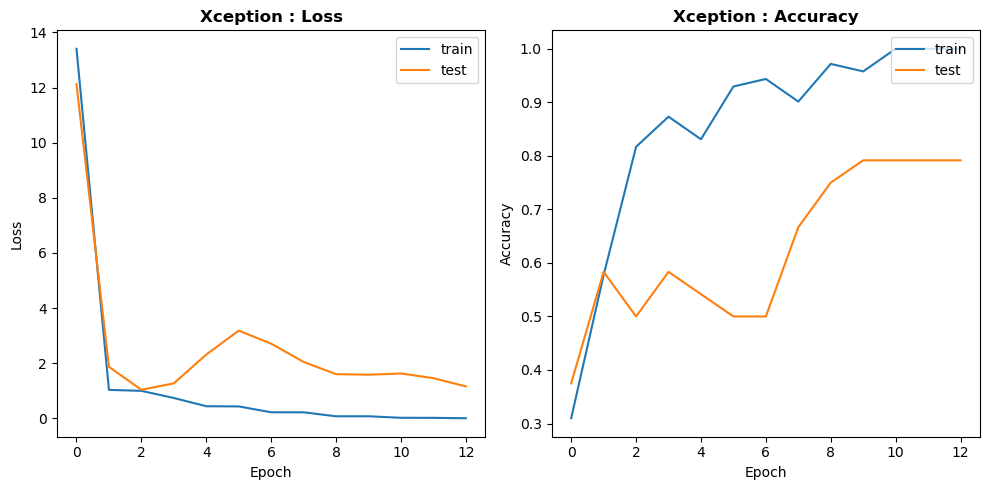

In [ ]:
plot_performance(model_name='Xception',
                acc=xception_history.history['accuracy'],
                 val_acc=xception_history.history['val_accuracy'],
                 loss=xception_history.history['loss'],
                 val_loss=xception_history.history['val_loss'])

<h4><u>With Augmentation</u></h4>

In [ ]:
checkpointer_xception_aug = ModelCheckpoint(filepath='xception_aug.weights.best.hdf5', verbose=3, save_best_only=True)

# Set up data augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

xception_history_aug=xception_model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train)//batch_size,
    epochs=epochs,
    callbacks=[checkpointer_xception_aug,early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = xception_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50


2023-10-13 17:23:15.272433: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - ETA: 0s - loss: 0.1821 - accuracy: 0.9531
Epoch 1: val_loss improved from inf to 0.92890, saving model to xception_aug.weights.best.hdf5
2/2 [==============================] - 7s 4s/step - loss: 0.1821 - accuracy: 0.9531 - val_loss: 0.9289 - val_accuracy: 0.7917
Epoch 2/50
2/2 [==============================] - ETA: 0s - loss: 0.0233 - accuracy: 1.0000
Epoch 2: val_loss did not improve from 0.92890
2/2 [==============================] - 4s 1s/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 1.4606 - val_accuracy: 0.7917
Epoch 3/50
2/2 [==============================] - ETA: 0s - loss: 0.0501 - accuracy: 0.9688
Epoch 3: val_loss did not improve from 0.92890
2/2 [==============================] - 5s 3s/step - loss: 0.0501 - accuracy: 0.9688 - val_loss: 1.9981 - val_accuracy: 0.8333
Epoch 4/50
2/2 [==============================] - ETA: 0s - loss: 0.6682 - accuracy: 0.8974
Epoch 4: val_loss improved from 0.92890 to 0.81268, saving model to xception

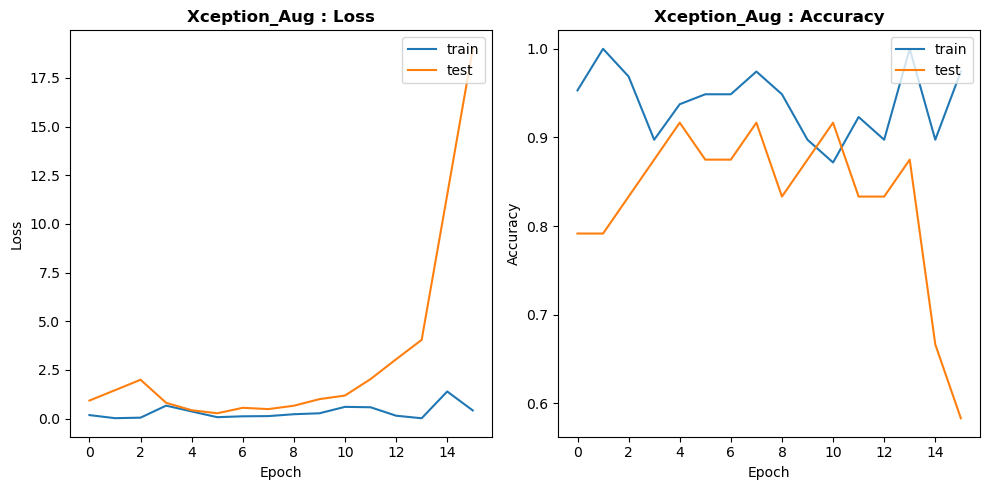

In [ ]:
plot_performance(model_name='Xception_Aug',
                acc=xception_history_aug.history['accuracy'],
                 val_acc=xception_history_aug.history['val_accuracy'],
                 loss=xception_history_aug.history['loss'],
                 val_loss=xception_history_aug.history['val_loss'])

In [ ]:
xception_model.load_weights('xception_aug.weights.best.hdf5')

## Visualisation

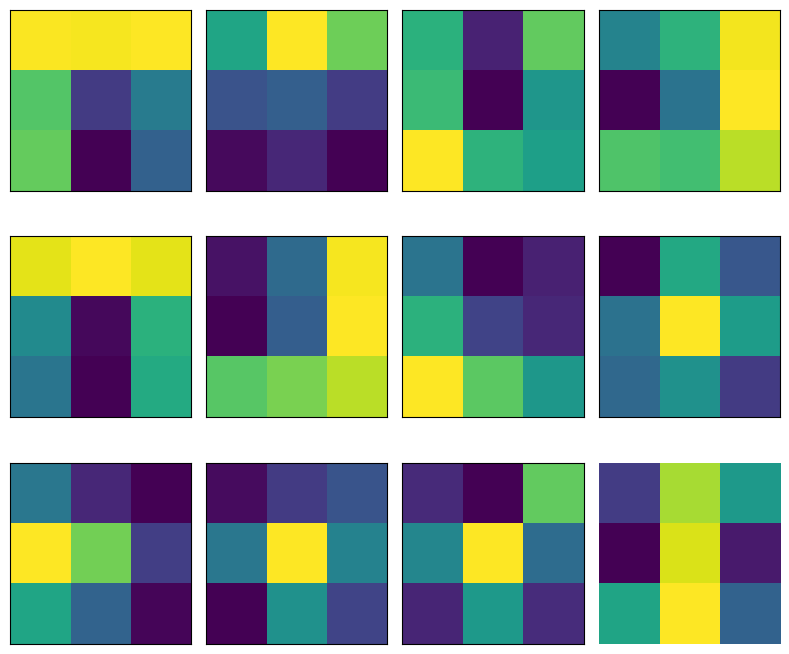

In [ ]:
fig, ax= plt.subplots(3,4, figsize=(8,8))

for i, ax in zip(range(12), ax.flatten()):

  conv1=xception_model.layers[0]
  weights1 = conv1.get_weights()
  kernels1 = weights1[0]
  kernel1_1 = kernels1[:,:,0,i]
  ax.imshow(kernel1_1)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.tight_layout()
  plt.axis('off');


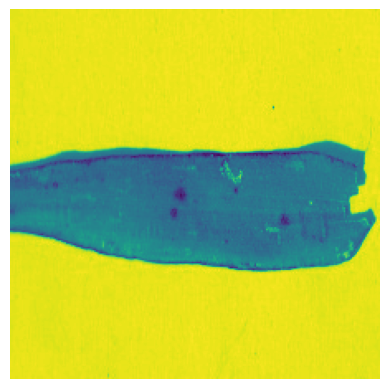

In [ ]:
image = tf.keras.utils.load_img('./Data/BrownSpot/DSC_0293.JPG', target_size=input_shape_2D)
input_arr = tf.keras.utils.img_to_array(image)/255
image = input_arr[:, :, 1]
plt.imshow(image)
plt.axis('off');

In [ ]:
import numpy as np

def convolution(image, kernel):
    # Get the size of the kernel
    kernel_size = kernel.shape[0]

    # Calculate the size of the output image
    output_size = image.shape[0] - kernel_size + 1

    # Initialize the output image
    output_image = np.zeros((output_size, output_size))

    # Pad the image with zeros
    padded_image = np.pad(image, ((kernel_size-1)//2, (kernel_size-1)//2), 'constant')

    # Apply the convolution operation
    for ii in range(output_size):
        for jj in range(output_size):
            window = padded_image[ii:ii+kernel_size, jj:jj+kernel_size]
            output_image[ii, jj] = np.sum(window * kernel)

    return output_image

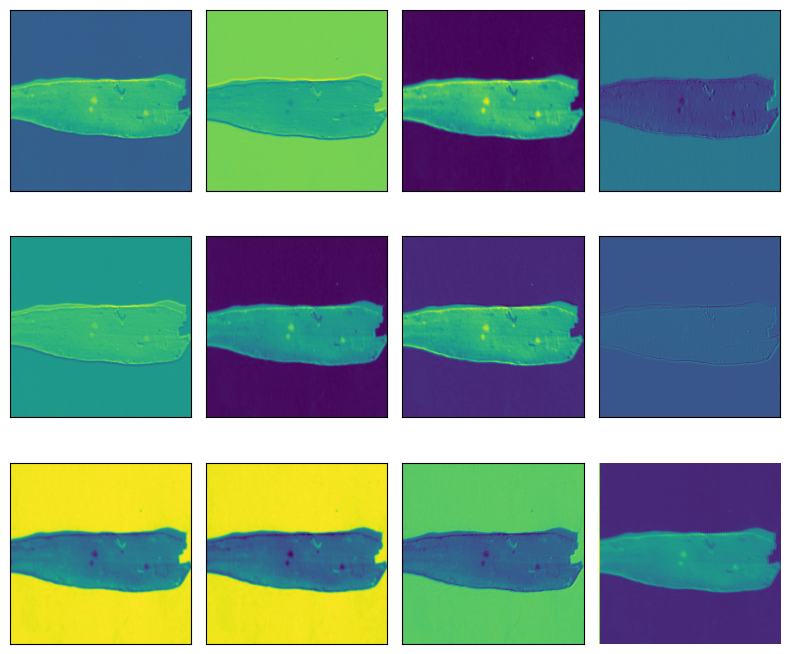

In [ ]:
fig, ax= plt.subplots(3,4, figsize=(8,8))

for i, ax in zip(range(12), ax.flatten()):

  conv1=xception_model.layers[0]
  weights1 = conv1.get_weights()
  kernels1 = weights1[0]
  kernel1_1 = kernels1[:,:,0,i]

  output=convolution(image, kernel1_1)

  ax.imshow(output)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.tight_layout()
  plt.axis('off');


## Visualising Prediction

In [ ]:
# get predictions on the test set
#loading image data
data_ds= tf.keras.utils.image_dataset_from_directory(
    directory='./Data/',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=None,
    image_size=input_shape_2D,
    seed=seed
)

y_hat = xception_model.predict(X_test)

# define text labels
labels = data_ds.class_names

Found 119 files belonging to 3 classes.
1/1 [==============================] - 1s 1s/step


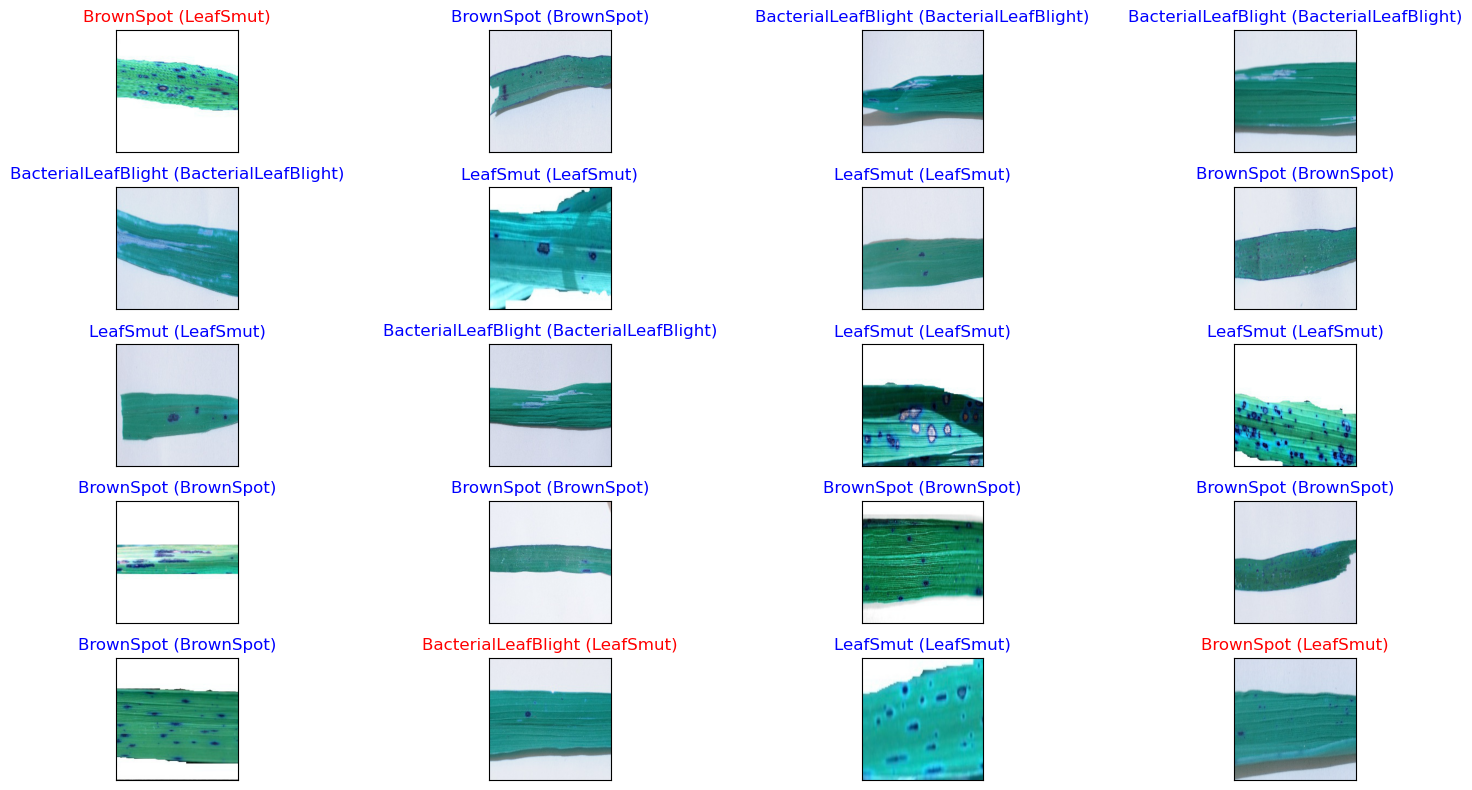

In [ ]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=20, replace=False)):
    ax = fig.add_subplot(5, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))
    plt.tight_layout()



## Challenges and Techiniques

<h2>Limited and Imbalanced Data:</h2>
<p><strong>Challenge:</strong> Obtaining a diverse and balanced dataset can be challenging, especially when dealing with rare diseases or specific geographic regions.</p>
<p><strong>Technique:</strong> Techniques like data augmentation, oversampling, or synthetic data generation can help mitigate imbalances and create a more comprehensive dataset.</p>

<h2>Fine-grained Classification:</h2>
<p><strong>Challenge:</strong> Distinguishing between different types of rice leaf diseases requires fine-grained classification, which can be more complex and challenging than binary or multi-class classification.</p>
<p><strong>Technique:</strong> Using deep learning models with multiple output classes and transfer learning from pre-trained models can improve fine-grained classification.</p>

<h2>Generalization:</h2>
<p><strong>Challenge:</strong> Ensuring the model generalizes well to unseen data, including variations in lighting, backgrounds, and image quality.</p>
<p><strong>Technique:</strong> Data augmentationtechniques, and pre-processing (e.g., normalization) can help improve generalization.</p>


<h2>Overfitting:</h2>
<p><strong>Challenge:</strong> Overfitting can occur when the model becomes too specialized on the training data and fails to generalize to the test data.</p>
<p><strong>Technique:</strong> Regularization techniques, early stopping, and dropout layers can help prevent overfitting.</p>

<h2>Transfer Learning:</h2>
<p><strong>Challenge:</strong> Selecting the right pre-trained model and determining which layers to fine-tune can be challenging.</p>
    <p><strong>Technique:</strong> Experiment with different pre-trained models (e.g., VGG, ResNet, Inception, Xception) and fine-tuning strategies (e.g., which layers to unfreeze).</p>


<h2>Data Pre-processing:</h2>
<p><strong>Challenge:</strong> Ensuring that data is pre-processed correctly, including resizing, normalizing pixel values, and handling image quality.</p>
<p><strong>Technique:</strong> Standardize the pre-processing pipeline to ensure consistency and data quality.</p>



<h1>Model Comparison Report</h1>

<h2>Overview</h2>
<p>In this report, we compare the performance of five different deep learning models for rice disease classification based on evaluation metrics.</p>

<h2>Model Summary Without Argumentation</h2>

<table border="1">
<tr>
    <th>Model</th>
    <th>Validation Accuracy</th>
    <th>Validation Loss</th>
    <th>Time Per Epoch</th>

</tr>
<tr>
    <td>VGG</td>
    <td>Validation Accuracy for VGG <strong>0.4167</strong></td>
    <td>Validation Loss for VGG <strong>1.0950</strong></td>
     <td>Time Per Epoch <strong>2000ms</strong></td>

</tr>
<tr>
    <td>Inception</td>
    <td>Validation Accuracy for Inception <strong>0.7500</strong></td>
    <td>Validation Loss for Inception <strong>17.9781</strong></td>
     <td>Time Per Epoch <strong>1544ms</strong></td>
</tr>
<tr>
    <td>Xception</td>
    <td>Validation Accuracy for Xception <strong> 0.7917</strong></td>
    <td>Validation Loss for Xception <strong>1.1564</strong></td>
     <td>Time Per Epoch <strong>1874ms</strong></td>

</tr>
<tr>
    <td>Own Model</td>
    <td>Validation Accuracy for Own Model <strong>0.7083</strong></td>
    <td>Validation Loss for Own Model <strong>1.2139</strong></td>
     <td>Time Per Epoch <strong>132ms</strong></td>

</tr>
<tr>
    <td>ResNet</td>
    <td>Validation Accuracy for ResNet <strong> 0.5833</strong></td>
    <td>Validation Loss for ResNet <strong>40.6863</strong></td>
     <td>Time Per Epoch <strong>2000ms</strong></td>

</tr>
</table>

<h2>Model Summary With Argumentation</h2>

<table border="1">
<tr>
    <th>Model</th>
    <th>Validation Accuracy</th>
    <th>Validation Loss</th>
    <th>Time Per Epoch</th>
</tr>
<tr>
    <td>VGG</td>
    <td>Validation Accuracy for VGG <strong>0.6667</strong></td>
    <td>Validation Loss for VGG <strong>0.7898</strong></td>
     <td>Time Per Epoch <strong>2000ms</strong></td>

</tr>
<tr>
    <td>Inception</td>
    <td>Validation Accuracy for Inception <strong> 0.8750</strong></td>
    <td>Validation Loss for Inception <strong>9.1195</strong></td>
     <td>Time Per Epoch <strong>1541ms</strong></td>

</tr>
<tr>
    <td>Xception</td>
    <td>Validation Accuracy for Xception <strong>0.5833</strong></td>
    <td>Validation Loss for Xception <strong>18.9907</strong></td>
     <td>Time Per Epoch <strong>1876ms</strong></td>

</tr>
<tr>
    <td>Own Model</td>
    <td>Validation Accuracy for Own Model <strong>0.3750</strong></td>
    <td>Validation Loss for Own Model <strong>1.0261</strong></td>
     <td>Time Per Epoch <strong>131ms</strong></td>

</tr>
<tr>
    <td>ResNet</td>
    <td>Validation Accuracy for ResNet <strong> 0.3750</strong></td>
    <td>Validation Loss for ResNet <strong>949.6318</strong></td>
     <td>Time Per Epoch <strong>2000ms</strong></td>

</tr>
</table>




In [ ]:
import pandas as pd

# Model Summary Without Argumentation
data_without_argumentation = {
    "Model": ["VGG", "Inception", "Xception", "Own Model", "ResNet"],
    "Validation Accuracy": [0.4167, 0.7500, 0.7917, 0.7083, 0.5833],
    "Validation Loss": [1.0950, 17.9781, 1.1564, 1.2139, 40.6863],
    "Time Per Epoch (ms)": [2000, 1544, 1874, 132, 2000]
}

df_without_argumentation = pd.DataFrame(data_without_argumentation)

# Model Summary With Argumentation
data_with_argumentation = {
    "Model": ["VGG", "Inception", "Xception", "Own Model", "ResNet"],
    "Validation Accuracy": [0.6667, 0.8750, 0.5833, 0.3750, 0.3750],
    "Validation Loss": [0.7898, 9.1195, 18.9907, 1.0261, 949.6318],
    "Time Per Epoch (ms)": [2000, 1541, 1876, 131, 2000]
}

df_with_argumentation = pd.DataFrame(data_with_argumentation)

# Merge the DataFrames
merged_df = pd.concat([df_without_argumentation, df_with_argumentation], keys=["Without Argumentation", "With Argumentation"])


merged_df


Model  Validation Accuracy  Validation Loss  \
Without Argumentation 0        VGG               0.4167           1.0950   
                      1  Inception               0.7500          17.9781   
                      2   Xception               0.7917           1.1564   
                      3  Own Model               0.7083           1.2139   
                      4     ResNet               0.5833          40.6863   
With Argumentation    0        VGG               0.6667           0.7898   
                      1  Inception               0.8750           9.1195   
                      2   Xception               0.5833          18.9907   
                      3  Own Model               0.3750           1.0261   
                      4     ResNet               0.3750         949.6318   

                         Time Per Epoch (ms)  
Without Argumentation 0                 2000  
                      1                 1544  
                      2                 1874  
                      3                  132  
                      4                 2000  
With Argumentation    0                 2000  
                      1                 1541  
                      2                 1876  
                      3                  131  
                      4                 2000

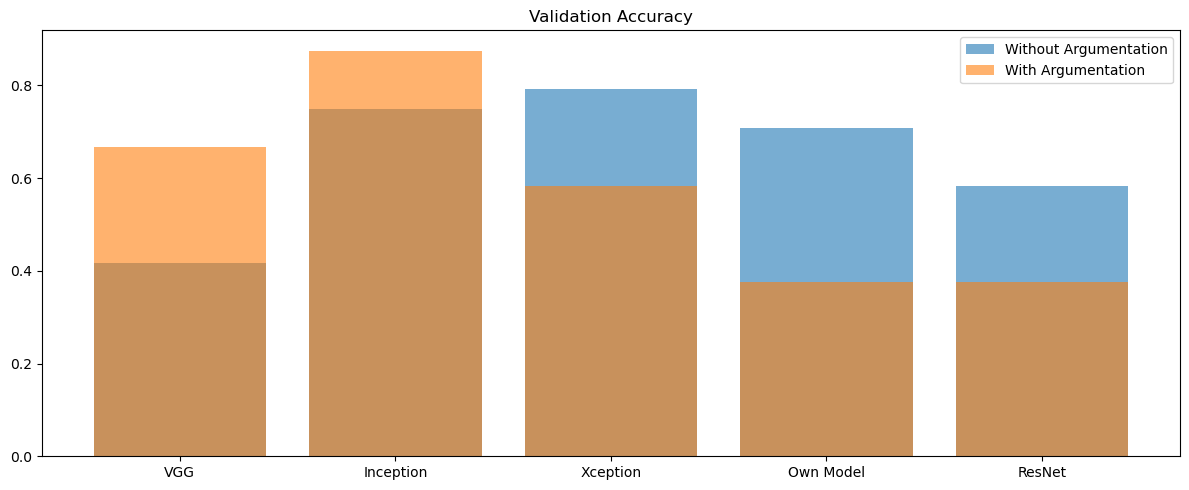

In [ ]:
import matplotlib.pyplot as plt

# Data for models without argumentation
models = ["VGG", "Inception", "Xception", "Own Model", "ResNet"]
validation_accuracy_without_arg = [0.4167, 0.7500, 0.7917, 0.7083, 0.5833]
validation_loss_without_arg = [1.0950, 17.9781, 1.1564, 1.2139, 40.6863]
time_per_epoch_without_arg = [2000, 1544, 1874, 132, 2000]

# Data for models with argumentation
validation_accuracy_with_arg = [0.6667, 0.8750, 0.5833, 0.3750, 0.3750]
validation_loss_with_arg = [0.7898, 9.1195, 18.9907, 1.0261, 949.6318]
time_per_epoch_with_arg = [2000, 1541, 1876, 131, 2000]

# Plot validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1,1,1)
plt.bar(models, validation_accuracy_without_arg, label='Without Argumentation', alpha=0.6)
plt.bar(models, validation_accuracy_with_arg, label='With Argumentation', alpha=0.6)
plt.title('Validation Accuracy')
plt.legend()


plt.tight_layout()
plt.show()


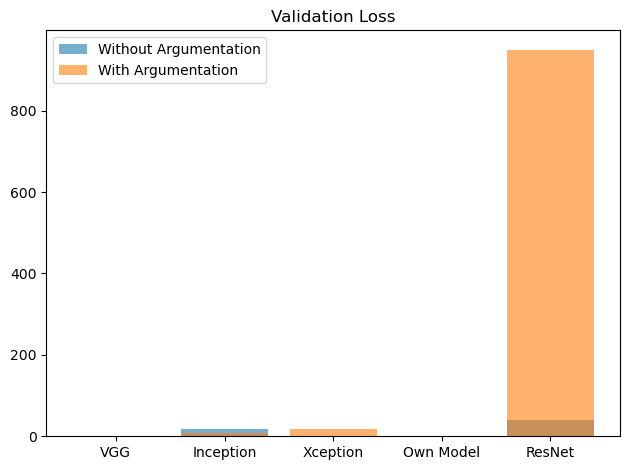

In [ ]:
# Plot validation loss
plt.subplot(1,1,1)
plt.bar(models, validation_loss_without_arg, label='Without Argumentation', alpha=0.6)
plt.bar(models, validation_loss_with_arg, label='With Argumentation', alpha=0.6)
plt.title('Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()



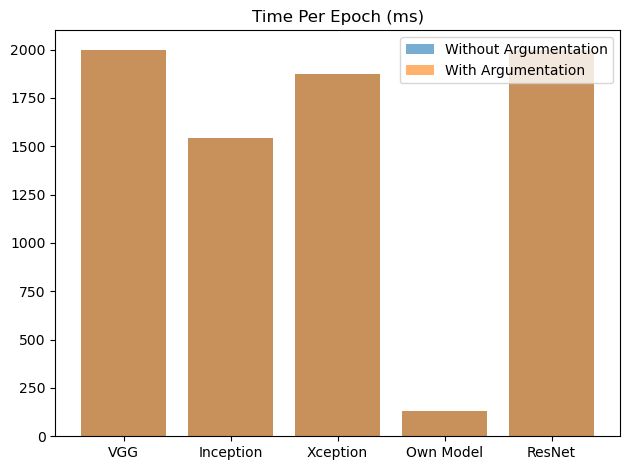

In [ ]:
# Plot time per epoch
plt.subplot(1,1,1)
plt.bar(models, time_per_epoch_without_arg, label='Without Argumentation', alpha=0.6)
plt.bar(models, time_per_epoch_with_arg, label='With Argumentation', alpha=0.6)
plt.title('Time Per Epoch (ms)')
plt.legend()

plt.tight_layout()
plt.show()


- <b>The Inception model performed the best in terms of validation accuracy with data augmentation, achieving an accuracy of 87.50%.</b>
- Without data augmentation, the Xception model achieved the highest accuracy at 79.17%.
- The Own Model had the fastest training time per epoch (131 ms) but lower accuracy compared to other models.

## Conclusion

In conclusion, the choice of model and the use of data augmentation significantly impact the performance of rice leaf disease classification. <strong>The Inception model</strong> with data augmentation showed the best overall performance in our experiments.

